In [107]:
import os
import pandas as pd
import numpy as np

from pprint import pprint
from matplotlib import pyplot as plt
import matplotlib as mlb
import seaborn as sns

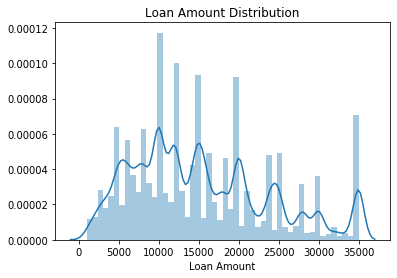

In [108]:
# Read the csv data file 
df = pd.read_csv('LoanStats_2015_subset.csv', low_memory=False)
sns.distplot(df.loc[:, 'loan_amnt'], hist=True, kde=True, rug=False,
             norm_hist=True, axlabel='Loan Amount')
plt.title('Loan Amount Distribution')
plt.show()

In [109]:
# Total loan volume and monthly averge loan size 
df1=df['loan_amnt']
#print(df1)
monthly_TotalLoanVolume=df1.sum(axis=0, skipna='true')/12.0
print('monthly_TotalLoanVolume=',monthly_TotalLoanVolume)

monthly_AverageLoanSize=df1.mean(axis=0, skipna='true')/12.0
print('monthly_AverageLoanSize',monthly_AverageLoanSize)

monthly_TotalLoanVolume= 534800681.25
monthly_AverageLoanSize 1270.0238218216791


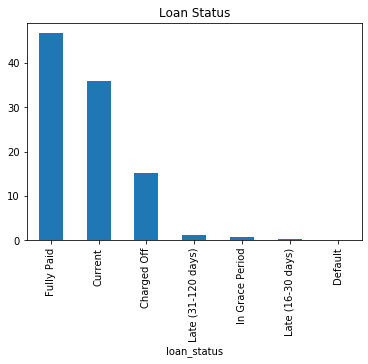

In [146]:
# Loan status by loan group
loan_status_grouped = df.groupby('loan_status').size().sort_values(ascending=False)/len(df) * 100
plotdata =loan_status_grouped
plotdata.plot(kind="bar")
plt.title('Loan Status')
plt.show()

In [151]:
# Calculation of the charge off rate. For this calculation , I have calculated the charge off rates by identifying how many
# particular loan grade is charge off with respect to total number of that particular loan grade.

temp=df[['grade','loan_status']]
temp1=temp[temp['loan_status']=='Charged Off']
K1=temp1.groupby('grade').count()

K2=temp.sort_values('grade')
K3=K2.groupby('grade').count()
K1['total']=K3['loan_status']
K1['charge_off rate %']=(K1['loan_status']/K1['total'])*100
K1

,loan_status,total,charge_off rate %
grade,,,
A,3303,73336,4.503927
B,11469,117606,9.752053
C,19554,120567,16.218368
D,14733,62654,23.514859
E,10162,34948,29.077487
F,3691,9817,37.598044
G,933,2167,43.054915


2) Charge off rates by load grade: A=4.5%,B=9.75%,C=16.2%,D=23.5%, E=29.0%,F=37.5%,G=43.0%

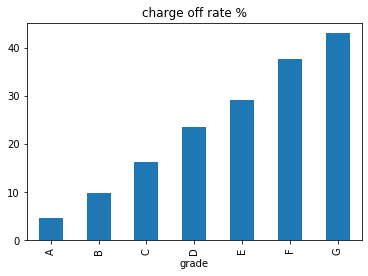

In [153]:
# plot of charge off rate 
ax = K1['charge_off rate %'].plot(kind="bar")
plt.title('charge off rate %')
plt.show()

3) The charge off rate by grade is statistically different by loan grade.  The charge off rates are more for the low grade load. A high net charge-off rate would suggest that the loan portfolio may be too risky. 

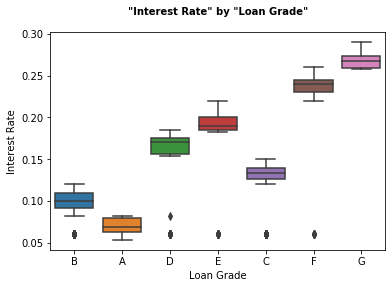

In [112]:
# Box plot of intrest rate with load grade

#interest rate is a string. Remove % and make it a float
df['int_rate'] = df['int_rate'].str.split('%').str[0]
df['int_rate'] = df.int_rate.astype(float)/100.
sns.boxplot(x='grade', y='int_rate', data=df)
plt.xlabel('Loan Grade')
plt.ylabel('Interest Rate')
plt.title('"Interest Rate" by "Loan Grade"\n',
          fontsize=10, fontweight='bold')
#plt.xticks(range(7), list(df['grade'].cat.categories),
           #fontweight='bold')
plt.show()

Section A:4) The lending club intrest rate is according to the loan grade. Low grade loan charged more intrest. Hence Lending Club charging an appropriate interest rate for the risk.